Loading data with file and
import lib

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
    
 
file = "../data_sources/raw_data/all_products.xlsx"    
df = pd.read_excel(file)

we need divide the table on six group for analysis

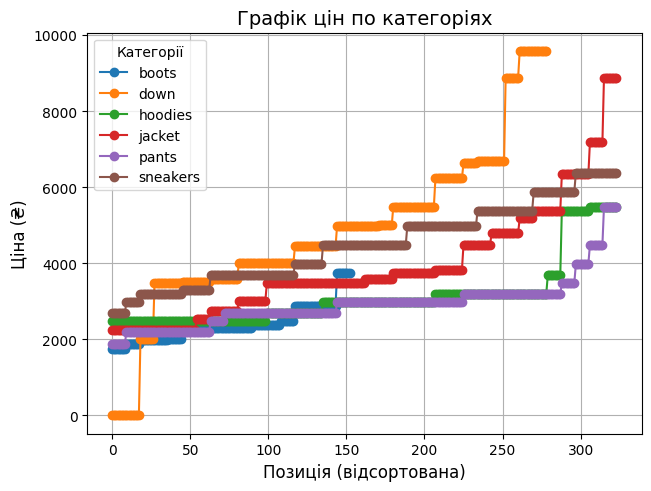

In [16]:
# cleansing of unnecessary signs
import re

def clean_price(price):
    if pd.isna(price) or price == '' or not isinstance(price, str):
        return '0'
    
    price = re.sub(r'[^\d,]', '', price)
    price = price.replace(',', '.')
    return price


df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].astype(float)  

fig, ax = plt.subplots(layout='constrained')

for category, group in df.groupby('category'):
    sorted_price = group['price'].sort_values()
    ax.plot(sorted_price.values, marker='o', label=category)

ax.set_title("Графік цін по категоріях", fontsize=14)
ax.set_xlabel("Позиція (відсортована)", fontsize=12)
ax.set_ylabel("Ціна (₴)", fontsize=12)
ax.legend(title="Категорії")
ax.grid(True)

plt.show()